### Описание

Проводится проверка гипотезы влияния [конфликта от 23-24 июня 2023 года](https://ru.wikipedia.org/wiki/%D0%9C%D1%8F%D1%82%D0%B5%D0%B6_%D0%A7%D0%92%D0%9A_%C2%AB%D0%92%D0%B0%D0%B3%D0%BD%D0%B5%D1%80%C2%BB#:~:text=%D0%9C%D1%8F%D1%82%D0%B5%D0%B6%20%D0%A7%D0%92%D0%9A%20%C2%AB%D0%92%D0%B0%D0%B3%D0%BD%D0%B5%D1%80%C2%BB%2C%20%D1%82%D0%B0%D0%BA%D0%B6%D0%B5,%D1%80%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%BC%D0%B8%20%D0%B2%D0%BB%D0%B0%D1%81%D1%82%D1%8F%D0%BC%D0%B8%20%D0%BA%D0%B0%D0%BA%20%D0%BF%D0%BE%D0%BF%D1%8B%D1%82%D0%BA%D0%B0%20%D0%BC%D1%8F%D1%82%D0%B5%D0%B6%D0%B0) на один из сегментов рынка коммерческого жилья по поисковому запросу торговой площадки ЦИАН.


**Данные.**

Поисковой запрос: https://www.cian.ru/cat.php?contract%5B0%5D=4&currency=2&deal_type=sale&engine_version=2&maxprice=100000000&minprice=20000000&minarea=200&minfloor=1&offer_type=offices&office_type%5B0%5D=1&office_type%5B1%5D=2&office_type%5B2%5D=3&office_type%5B3%5D=5&office_type%5B4%5D=7&region=1&sort=area_order&p=1


Даты выгрузок:
15.06.2023;
19.06.2023;
20.06.2023;
26.06.2023;
28.06.2023;
29.06.2023;
30.06.2023;
01.07.2023;
05.07.2023;
06.07.2023;
07.07.2023.


Основные фильтры сегмента: стоимость от 20 до 100 млн. руб., площадь от 200 кв.м., продажа объектов без юрид. лица, не цоколь, не подвал, не технический этаж.


Факторы: стоимость за кв. м, общая стоимость, этаж, этажность, материал стен, год постройки, площадь, широта и долгота.

# 0. Загрузка библиотек 

In [1]:
#Блок 1 с наиболее устойчивыми вспомогательными элементами
#--------------------------------------------------------------------------------
#Импорт системных библиотек
import warnings
warnings.simplefilter("ignore")
#Импорт базовых библиотек анализа данных 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from matplotlib.patches import Rectangle



#Функция расчета расстояния между 2 координатами
import math
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance in meters between two points given their latitude and longitude coordinates.
    """
    # Radius of the Earth in meters
    earth_radius = 6371000
    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    # Haversine formula
    a = math.sin(delta_lat/2) * math.sin(delta_lat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2) * math.sin(delta_lon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    # Calculate the distance
    distance = earth_radius * c

    return distance

# 1. Загрузка, фильтрация и исправление датасета

In [2]:
#Блок 2: Загрузка файла Excel, отсев продажи бизнеса, вычисление стоимости за м2
#--------------------------------------------------------------------------------
PATH = r"C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\MVP CIAN\data\CIAN_Pages_2023_07_05_09_48_3020To100mln\\"
#C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\MVP CIAN\data\CIAN_Pages_2023_05_31_11_17_11
df_file_name = PATH + 'Df2023_07_05_09_48_30.xlsx'


#Убираем объявления с продажей бизнеса
data = pd.read_excel(df_file_name) 
print('Кол-во наблюдений в исходном датасете: '+str(len(data)))
data = data[data['Ready Business?']!='"rentalBusiness"']
data = data[data['Ready Business?']!='"readyBusiness"']
data = data[(data['Full Price']<0)|(data['Full Price']>0)]
data['Price Per Square Meter'] = data['Full Price']/data['Total Area']

print('Кол-во наблюдений после фильтрации бизнеса по факторам ЦИАН: '+str(len(data)))


#Очистка по дате (NULL остается)
data = data[(data['Build Year'] > 1950) | data['Build Year'].isnull()]
print('Кол-во наблюдений после фильтрации зданий до 1950 года (у которых заполнено) '+str(len(data_tmp)))


Кол-во наблюдений в исходном датасете: 1509
Кол-во наблюдений после фильтрации бизнеса по факторам ЦИАН: 1157


NameError: name 'data_tmp' is not defined

In [20]:
#Поправка наблюдений, в которых цена за квадратный метр попала в общую стоимость
X = 1000000

print('Кол-во наблюдений, в которых цена за квадратный метр попала в общую стоимость: '+str(len(data[data['Full Price'] < X])))
print('Средняя стоимость за кв метр в неправильной подвыборке до исправления: '+str(data[data['Full Price'] < X]['Price Per Square Meter'].mean()))

# Сохраняем значения df['Price Per Square Meter'] и df['Full Price'] в отдельные переменные
price_per_square_meter_values = data.loc[data['Full Price'] < X, 'Price Per Square Meter'].copy()
full_price_values = data.loc[data['Full Price'] < X, 'Full Price'].copy()

# Заменяем значения в колонке 'Price Per Square Meter'
data.loc[data['Full Price'] < X, 'Price Per Square Meter'] = full_price_values

# Заменяем значения в колонке 'Full Price'
data.loc[data['Full Price'] < X, 'Full Price'] = price_per_square_meter_values

# Выводим измененный датафрейм
print('Средняя стоимость за кв метр в неправильной подвыборке после исправления: '+str(data[data['Full Price'] < X]['Price Per Square Meter'].mean()))

Кол-во наблюдений, в которых цена за квадратный метр попала в общую стоимость: 62
Средняя стоимость за кв метр в неправильной подвыборке до исправления: 528.5767299263946
Средняя стоимость за кв метр в неправильной подвыборке после исправления: 226894.16129032258


# 2. Анализ статистик факторов

In [ ]:
data_for_stats = data.copy()

In [ ]:
NameColumn = 'Price Per Square Meter'
RUSNameColumn = 'Стоимость за квадратный метр'

data_tmp = data_for_stats[NameColumn].copy()
twentyfifth, seventyfifth, ninetyfifth = np.percentile(data_tmp, [10, 50, 90])

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
counts, bins, patches = ax.hist(data_tmp, 
                                facecolor=perc_50_colour, 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(len(data_tmp))))

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
#plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Число объектов', fontsize=20)
plt.xlabel(RUSNameColumn, fontsize=20)

# Change the colors of bars at the edges
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,.2f}%".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=15)

    
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, 
                                                         perc_50_colour, 
                                                         perc_75_colour, 
                                                         perc_95_colour]]
labels= ["0-10 Percentile",
         "10-50 Percentile", 
         "50-90 Percentile", 
         ">90 Percentile"]
# Annotation for bar values
ax.annotate('N='+str(len(data_tmp))
            +'\n 10 Percentile='+str(round(twentyfifth,4))
            +'\n 50 Percentile='+str(round(seventyfifth,4))
            +'\n 90 Percentile='+str(round(ninetyfifth,4)),
            xy=(.75,.50), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=20, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99), fontsize=18)
# Display the graph
plt.show()


print('Среднее значение: ' + str(int(data_for_stats[NameColumn].mean()))) 
print('Медиана: '+ str(int(data_for_stats[NameColumn].median())))
#print('Дисперсия: '+ str(int(data_for_stats[NameColumn].var())))


In [45]:
data_for_stats[['Id Promotion', 'Price Per Square Meter']].sort_values('Price Per Square Meter', ascending=False).head(10)

,Id Promotion,Price Per Square Meter
50,www.cian.ru/sale/commercial/288811428,456272.622478
31,www.cian.ru/sale/commercial/279937263,456272.622478
40,www.cian.ru/sale/commercial/279937286,456272.622478
42,www.cian.ru/sale/commercial/279937290,456272.622478
41,www.cian.ru/sale/commercial/279937281,456272.622478
28,www.cian.ru/sale/commercial/286354780,456272.622478
29,www.cian.ru/sale/commercial/288811423,456272.622478
30,www.cian.ru/sale/commercial/279937278,456272.622478
32,www.cian.ru/sale/commercial/279937269,456272.622478
45,www.cian.ru/sale/commercial/288811397,456272.622478


<AxesSubplot: >

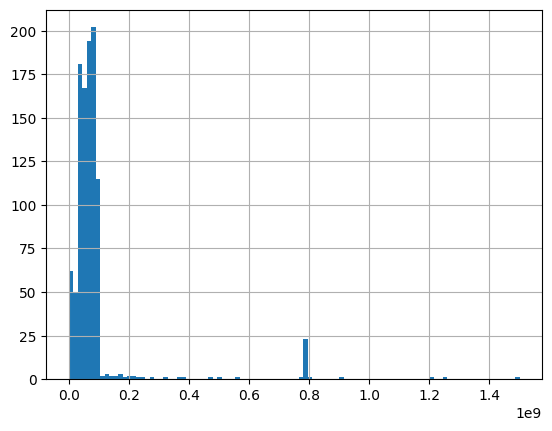

In [8]:
data_for_stats['Full Price'].hist(bins=100)

In [23]:
data_for_stats[NameColumn].min()

15.681818181818182

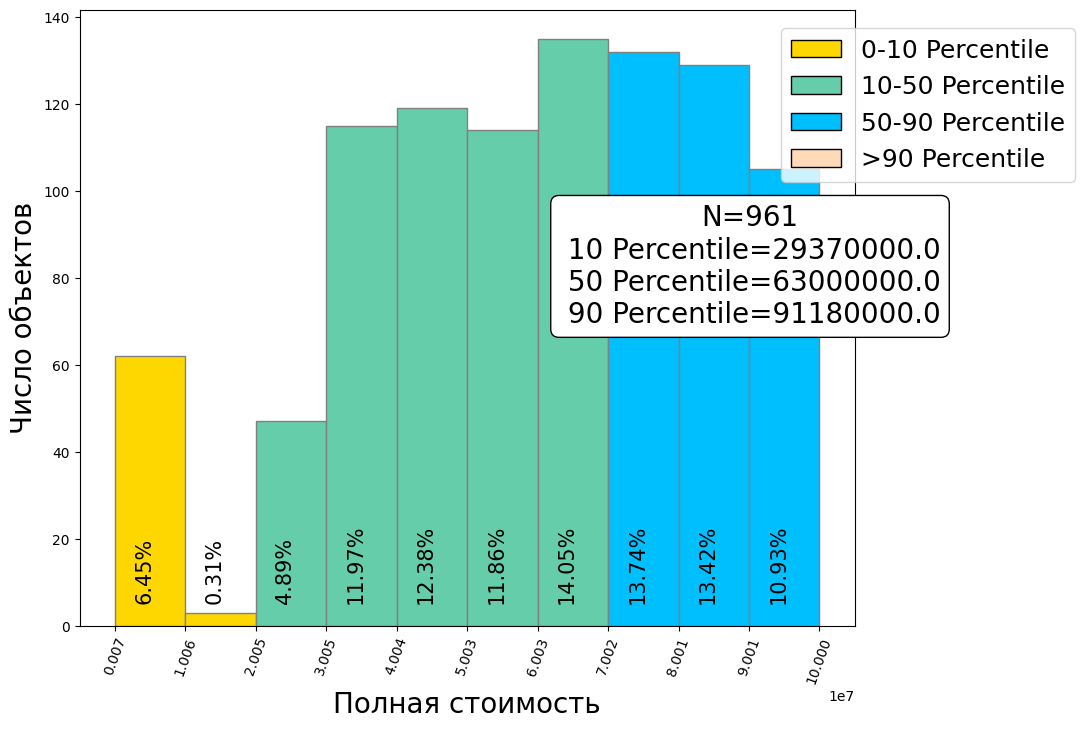

Среднее значение: 86837651
Медиана: 65000000
Дисперсия: 19481829892856612


In [43]:
NameColumn = 'Full Price'
RUSNameColumn = 'Полная стоимость'

data_tmp = data_for_stats[NameColumn].copy()

tmp = data_tmp.mean()
data_tmp = data_tmp[abs(data_tmp)<100000000]




twentyfifth, seventyfifth, ninetyfifth = np.percentile(data_tmp, [10, 50, 90])

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
counts, bins, patches = ax.hist(data_tmp, 
                                facecolor=perc_50_colour, 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(len(data_tmp))))

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
#plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Число объектов', fontsize=20)
plt.xlabel(RUSNameColumn, fontsize=20)

# Change the colors of bars at the edges
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,.2f}%".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=15)

    
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, 
                                                         perc_50_colour, 
                                                         perc_75_colour, 
                                                         perc_95_colour]]
labels= ["0-10 Percentile",
         "10-50 Percentile", 
         "50-90 Percentile", 
         ">90 Percentile"]
# Annotation for bar values
ax.annotate('N='+str(len(data_tmp))
            +'\n 10 Percentile='+str(round(twentyfifth,4))
            +'\n 50 Percentile='+str(round(seventyfifth,4))
            +'\n 90 Percentile='+str(round(ninetyfifth,4)),
            xy=(.75,.50), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=20, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99), fontsize=18)
# Display the graph
plt.show()


print('Среднее значение: ' + str(int(data_for_stats[NameColumn].mean()))) 
print('Медиана: '+ str(int(data_for_stats[NameColumn].median())))
#print('Дисперсия: '+ str(int(data_for_stats[NameColumn].var())))

In [ ]:
# Анализ основных факторов

print('Кол-во наблюдений после фильтрации зданий до 1950 года (у которых заполнено) '+str(len(data)))


# Анализ года


# Анализ геопозиции





data['Full Price'].mean()

# 3. Кластерный анализ

In [ ]:
#Блок 2.1 поправкa данных  
#--------------------------------------------------------------------------------

#Обмен местами значений столбцов, если общая стоимость меньше 1млн 
#mask = data['Full Price'] < 1000000
#data.loc[mask, ['Price Per Square Meter', 'Full Price']] = data.loc[mask, ['Full Price', 'Price Per Square Meter']].values
#data[['Id Promotion', 'Price Per Square Meter', 'Full Price']].sort_values('Price Per Square Meter').head(20)

#Детекция цоколя
data['Tcokol'] = data['Description'].str.contains('цок', case=False, na=False).astype(int)
data = data[data['Tcokol']==0]
data = data.drop('Tcokol', axis=1)
print('Кол-во наблюдений после фильтрации цоколя '+str(len(data)))

#Доп детекция бизнеса
data['Buis'] = data['Description'].str.contains('вый бизнес', case=False, na=False).astype(int)
data = data[data['Buis']==0]
print('Кол-во наблюдений после доп фильтрации бизнеса '+str(len(data)))


#Детекция склада
data['Sklad'] = data['Description'].str.contains('клад', case=False, na=False).astype(int)
data = data[data['Sklad']==0]
data = data.drop('Sklad', axis=1)
print('Кол-во наблюдений после фильтрации склада '+str(len(data)))


#Детекция автомоек
data['CarWasher'] = data['Description'].str.contains('втомойка', case=False, na=False).astype(int)
data = data[data['CarWasher']==0]
data = data.drop('CarWasher', axis=1)
print('Кол-во наблюдений после фильтрации автомоек '+str(len(data)))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

silhouette = 0
for N_CLUSTERS in range(5, 13):


    # Преобразование координат в отклонение от центра Красной площади в метрах
    red_square_lat = 55.7538337
    red_square_lng = 37.6211812

    data_feature_engine['X'] = (data_feature_engine['Lat'] - red_square_lat) * 111000  # Приблизительное значение 1 градуса широты в метрах
    data_feature_engine['Y'] = (data_feature_engine['Lng'] - red_square_lng) * 111000 * np.cos(np.deg2rad(red_square_lat))  # Приблизительное значение 1 градуса долготы в метрах

    # Кластеризация методом иерархической кластеризации
    clustering = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(data_feature_engine[['X', 'Y']])

    # Добавление меток кластеров в DataFrame
    data_feature_engine['Cluster'] = clustering.labels_

    # Отображение топ кластеров по объему наблюдений и среднему значению 'Price Per Square Meter'
    top_clusters = data_feature_engine['Cluster'].value_counts().nlargest(N_CLUSTERS).index
    for cluster in top_clusters:
        cluster_data = data_feature_engine[data_feature_engine['Cluster'] == cluster]
        cluster_mean_price = cluster_data['Price Per Square Meter'].mean()
        #print("Cluster:", cluster)
        #print("Observations:", len(cluster_data))
        #print("Average Price Per Square Meter:", cluster_mean_price)
        #print("-------")

    old_silhouette = silhouette
    # Вычисление метрики силуэтта
    silhouette = silhouette_score(data_feature_engine[['X', 'Y']], clustering.labels_)

    # Вывод метрики силуэтта
    print("Число кластеров "+str(N_CLUSTERS))
    print("Silhouette Score:", silhouette)
    print("Diff Silhouette Score:", silhouette-old_silhouette)
    print("-------")

from matplotlib.colors import ListedColormap
# Отображение данных
#colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta']
#plt.scatter(data_feature_engine['X'], data_feature_engine['Y'], c=data_feature_engine['Cluster'], cmap=ListedColormap(colors))
#plt.xlabel('X (meters)')
#plt.ylabel('Y (meters)')
#plt.title('Data Visualization')
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'gray', 'olive']

# Создание colormap с использованием списка цветов
cmap = ListedColormap(colors)

# График рассеяния с использованием цветов кластеров
plt.scatter(data_feature_engine['X'], data_feature_engine['Y'], c=data_feature_engine['Cluster'], cmap=cmap)


# Создание легенды
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label='Кластер '+str(i)) for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left')


plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('Data Visualization')
plt.show()
